## Classification of Adults

Adults Dataset: http://archive.ics.uci.edu/dataset/2/adult

### 1. Import and clean dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
headers = ["age", "workclass", "fnlwgt", "education", "education-num", "marital status", "occupation", "relationship", "race", "sex", "capital gain", "capital loss", "hours-per-week", "native country", "income"]
data = pd.read_csv('./datasets/adult.data', header=None, names = headers)
data.head()

,age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital status    object
occupation        object
relationship      object
race              object
sex               object
capital gain       int64
capital loss       int64
hours-per-week     int64
native country    object
income            object
dtype: object


In [4]:
print(data['income'].value_counts())

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [5]:
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours-per-week    0
native country    0
income            0
dtype: int64


In [6]:
data = data.drop(labels=["fnlwgt", "education-num"], axis=1)
data[:5]

,age,workclass,education,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
le = LabelEncoder()
data['age'] = le.fit_transform(data['age'])
data['workclass'] = le.fit_transform(data['workclass'])
data['education'] = le.fit_transform(data['education'])
data['marital status'] = le.fit_transform(data['marital status'])
data['occupation'] = le.fit_transform(data['occupation'])
data['relationship'] = le.fit_transform(data['relationship'])
data['race'] = le.fit_transform(data['race'])
data['sex'] = le.fit_transform(data['sex'])
data['capital gain'] = le.fit_transform(data['capital gain'])
data['capital loss'] = le.fit_transform(data['capital loss'])
data['hours-per-week'] = le.fit_transform(data['hours-per-week'])
data['native country'] = le.fit_transform(data['native country'])
data['income'] = le.fit_transform(data['income'])
data.head()

,age,workclass,education,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,income
0,22,7,9,4,1,1,4,1,25,0,39,39,0
1,33,6,9,2,4,0,4,1,0,0,12,39,0
2,21,4,11,0,6,1,4,1,0,0,39,39,0
3,36,4,1,2,6,0,2,1,0,0,39,39,0
4,11,4,9,2,10,5,2,0,0,0,39,5,0


In [8]:
print(data['income'].value_counts())

income
0    24720
1     7841
Name: count, dtype: int64


In [9]:
data = data.to_numpy()
print(data[0:5,:])

[[22  7  9  4  1  1  4  1 25  0 39 39  0]
 [33  6  9  2  4  0  4  1  0  0 12 39  0]
 [21  4 11  0  6  1  4  1  0  0 39 39  0]
 [36  4  1  2  6  0  2  1  0  0 39 39  0]
 [11  4  9  2 10  5  2  0  0  0 39  5  0]]


### 2. Define visualization functions

In [10]:
def draw_heatmap(acc, acc_desc, C_list, character):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$'  + character + '$')
    plt.title(acc_desc + ' w.r.t $' + character + '$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [11]:
def draw_curve(acc, acc_desc, C_list, character):
    plt.figure()
    plt.plot(range(len(C_list)), acc, label=acc_desc)
    plt.xticks(range(len(C_list)),labels=C_list)
    plt.xlabel(character)
    plt.ylabel('Accuracy')
    plt.title(acc_desc + ' w.r.t $' + character + '$')
    plt.legend()
    plt.show()

### 3. Classification

In [12]:
avg_test_acc_result = np.zeros((3,3))
best_train_result = np.zeros((3,3))
best_param_result = np.zeros((3,3))

### 3.1 Using Logistic Regression Classifier

In [13]:
def logReg_classifier():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    classifier = LogisticRegression(random_state=0)
    C_list = [10**-8, 10**-7, 10**-6,10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]
    paramaters = {'C': C_list}
    clf = GridSearchCV(classifier, paramaters, return_train_score = True, cv = 5)
    clf.fit(X_train_scaled, Y_train)

    train_acc = clf.cv_results_['mean_train_score']
    draw_heatmap(train_acc.reshape(-1,1), 'LR train accuracy', C_list, 'C')
    draw_curve(train_acc.reshape(-1,1), 'LR train accuracy', C_list, 'C')

    val_acc = clf.cv_results_['mean_test_score']
    draw_heatmap(val_acc.reshape(-1,1), 'LR val accuracy', C_list, 'C')
    draw_curve(val_acc.reshape(-1,1), 'LR val accuracy', C_list, 'C')
    
    opt_classifier = LogisticRegression(random_state=0, C = clf.best_params_['C'])
    
    for i,j in enumerate(C_list):
        if j == clf.best_params_['C']:
            best_train_acc = train_acc[i]

    opt_classifier.fit(X_train_scaled, Y_train)
    test_acc = opt_classifier.score(X_test_scaled, Y_test)
    return test_acc, best_train_acc, clf.best_params_['C']

Partition:  0.8


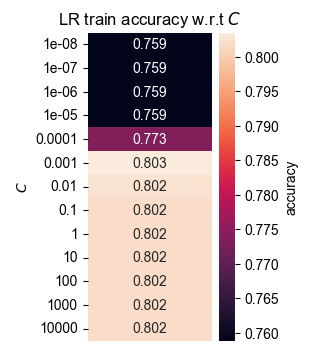

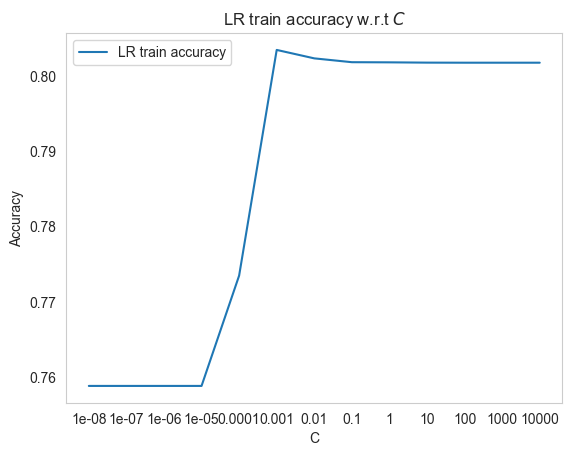

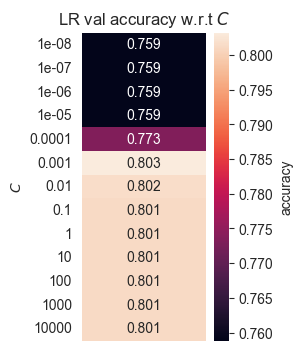

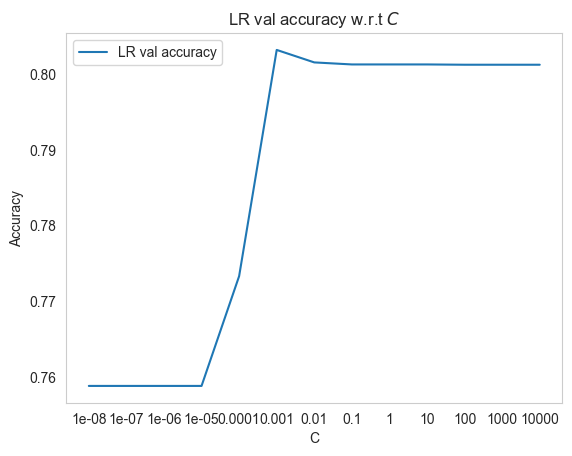

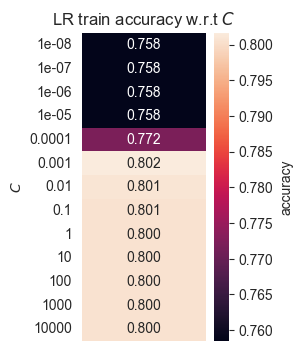

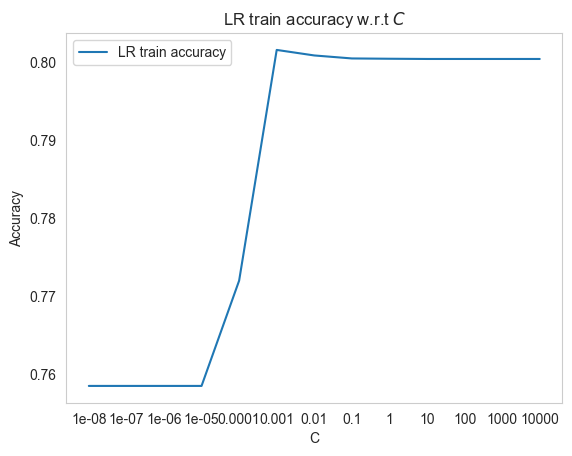

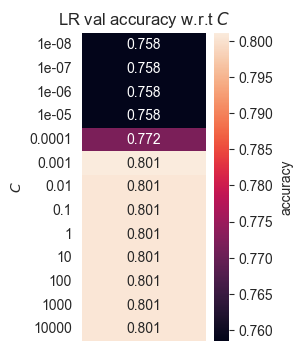

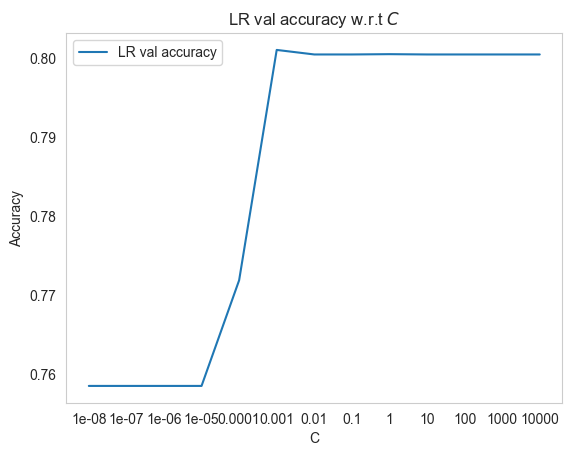

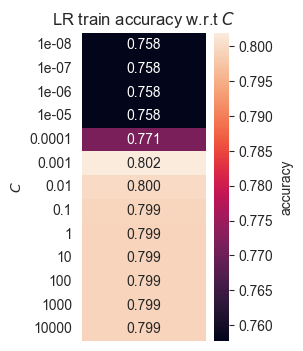

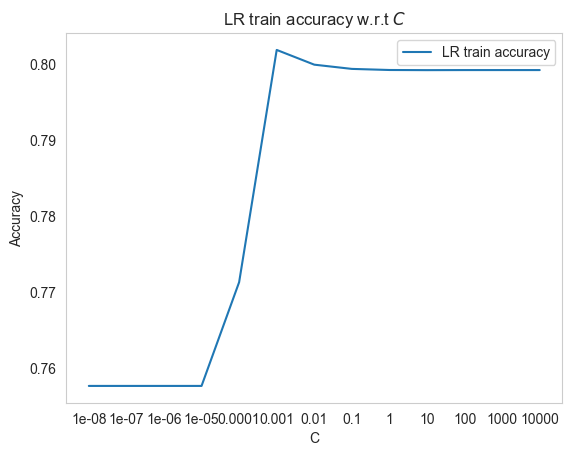

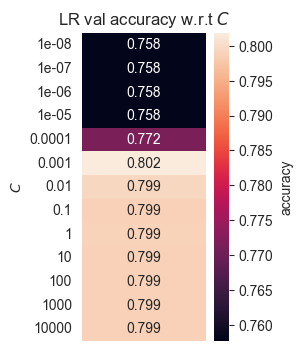

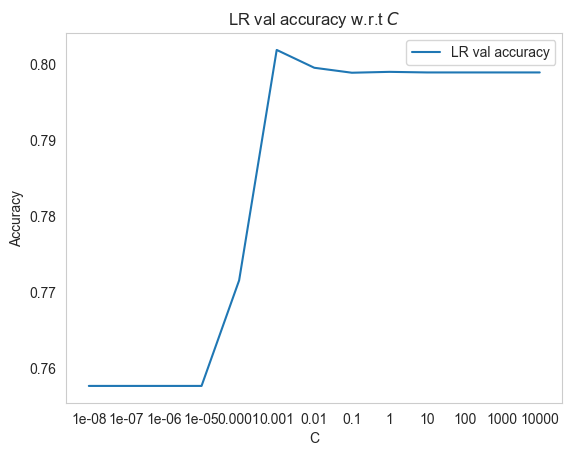

Test Accuracy Average Over 3 Trials for Logistic Regression =  0.8075131787706638
Partition:  0.5


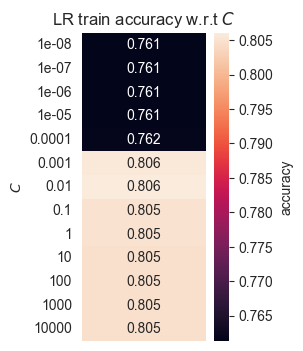

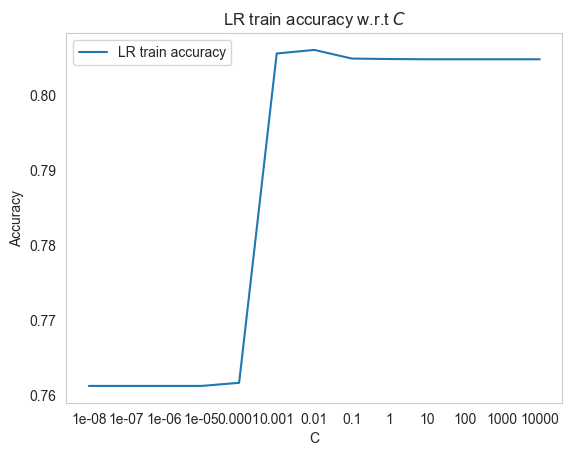

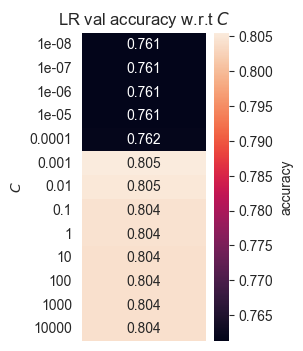

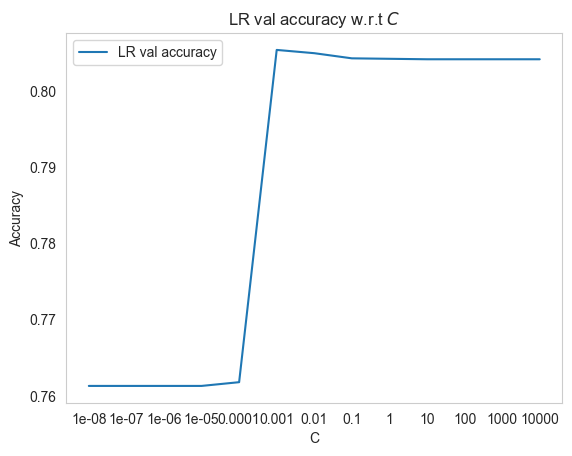

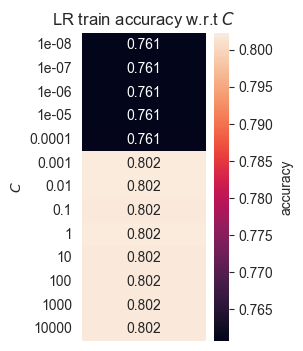

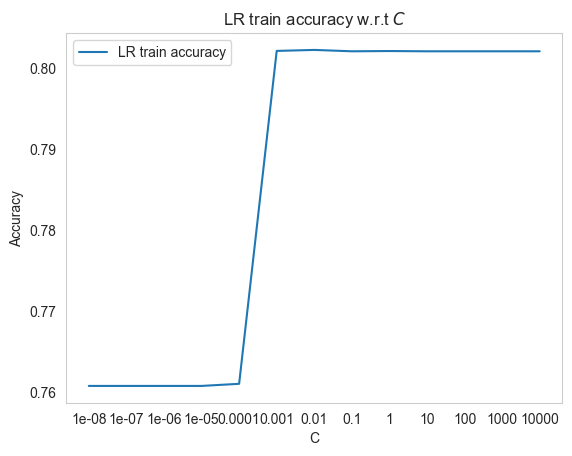

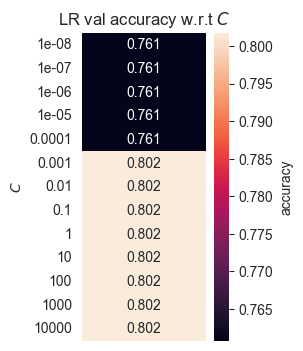

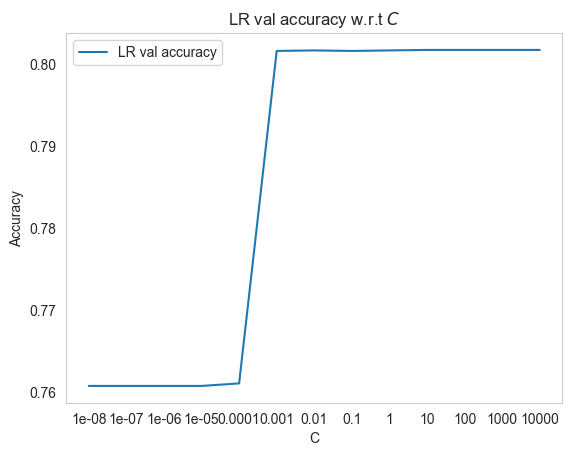

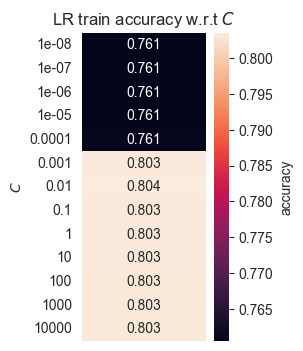

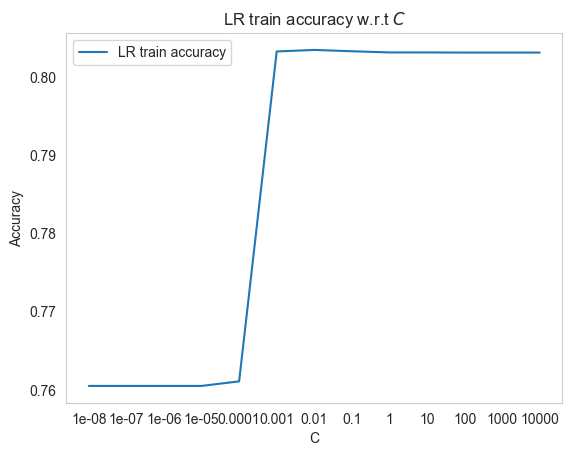

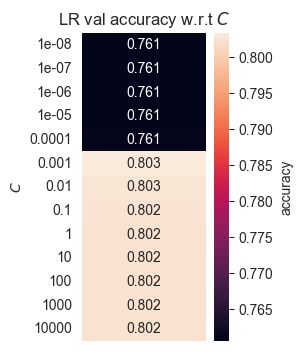

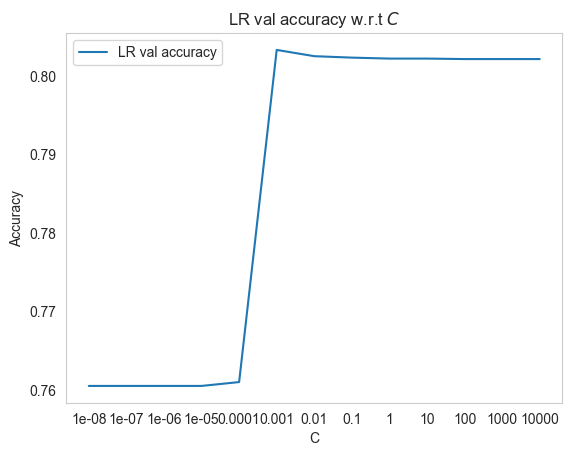

Test Accuracy Average Over 3 Trials for Logistic Regression =  0.8010359724013677
Partition:  0.2


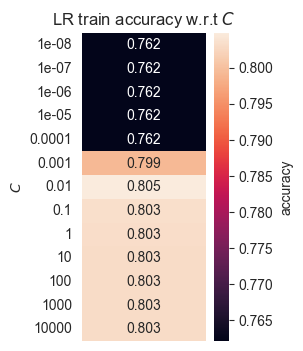

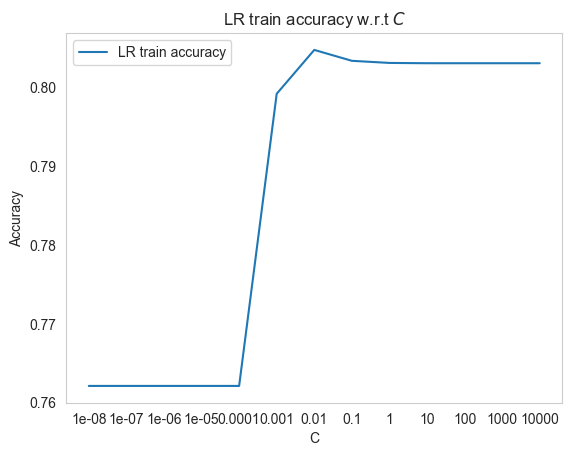

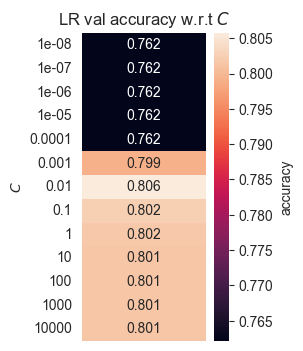

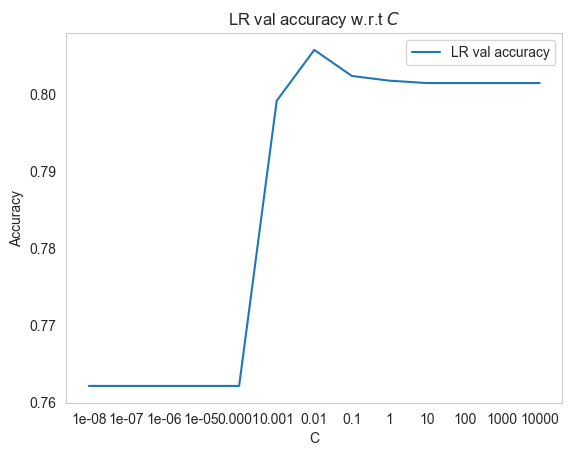

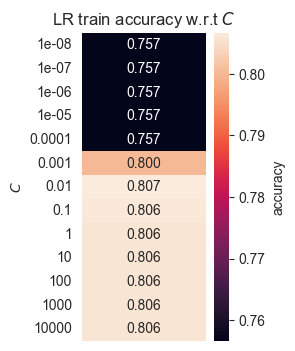

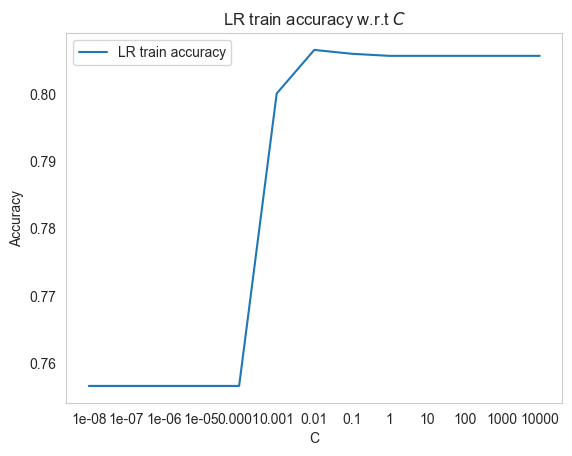

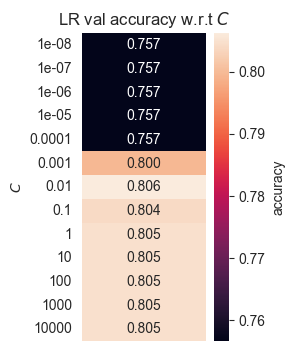

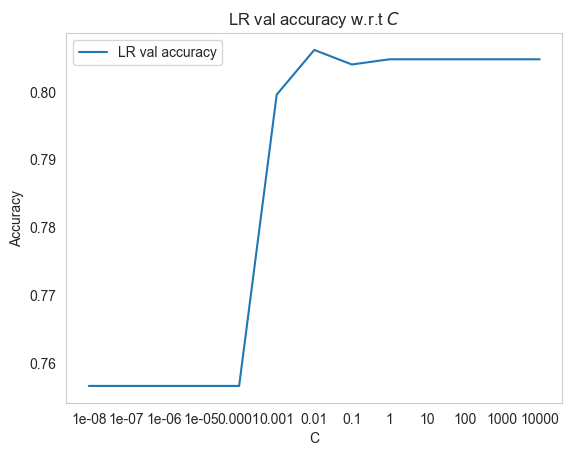

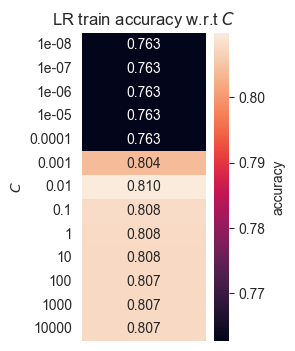

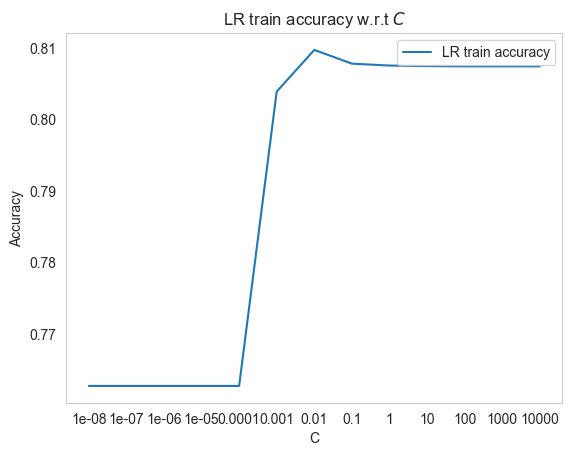

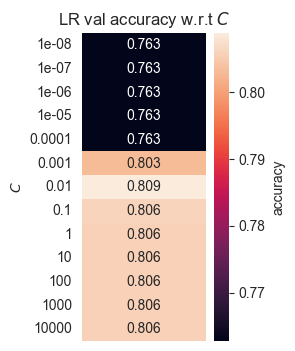

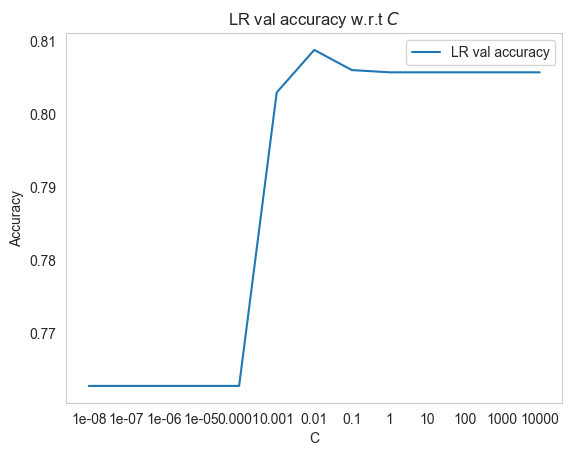

Test Accuracy Average Over 3 Trials for Logistic Regression =  0.8017582248838727


In [14]:
partition_val = [0.8, 0.5, 0.2]
for i, partition in enumerate(partition_val):
    print("Partition: ", partition)
    logReg_test_acc = []

    for trial in range(3):
        np.random.shuffle(data)
        X_train = data[:int(partition*len(data)), :-1]
        Y_train = data[:int(partition*len(data)), -1]
        X_test = data[int(partition*len(data)):, :-1]
        Y_test = data[int(partition*len(data)):, -1]

        test_acc, best_train, c = logReg_classifier()
        logReg_test_acc.append(test_acc)
        
    avg_test_acc = sum(logReg_test_acc)/3
    avg_test_acc_result[i, 0] = avg_test_acc
    best_train_result[i, 0] = best_train
    best_param_result[i, 0] = c
    
    print("Test Accuracy Average Over 3 Trials for Logistic Regression = ", avg_test_acc)

### 3.2 Using SVM Classifier

In [15]:
def svm_classifier():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    classifier = svm.SVC(kernel = 'linear')
    C_list     = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10,] 
    parameters = {'C': C_list}
    clf = GridSearchCV(classifier, parameters, return_train_score = True, cv=5, n_jobs=-1)
    clf.fit(X_train_scaled, Y_train)

    train_acc = clf.cv_results_['mean_train_score']
    draw_heatmap(train_acc.reshape(-1,1), 'SVM train accuracy', C_list, 'C')
    draw_curve(train_acc.reshape(-1,1), 'SVM train accuracy', C_list, 'C')

    val_acc = clf.cv_results_['mean_test_score']
    draw_heatmap(val_acc.reshape(-1,1), 'SVM val accuracy', C_list, 'C')
    draw_curve(val_acc.reshape(-1,1), 'SVM val accuracy', C_list, 'C')

    opt_classifier = svm.SVC(kernel = 'linear', C = clf.best_params_['C'] )
    
    for i,j in enumerate(C_list):
        if j == clf.best_params_['C']:
            best_train_acc = train_acc[i]
            
    opt_classifier.fit(X_train_scaled, Y_train)
    test_acc = opt_classifier.score(X_test_scaled, Y_test)
    return test_acc, best_train_acc, clf.best_params_['C']

Partition:  0.8


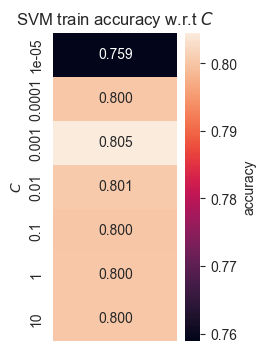

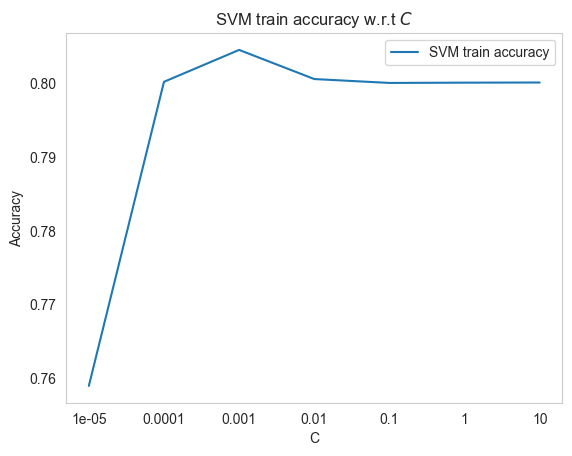

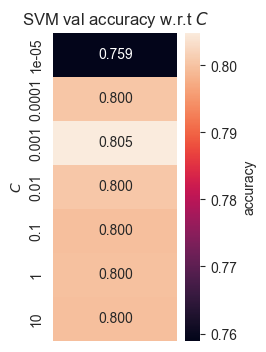

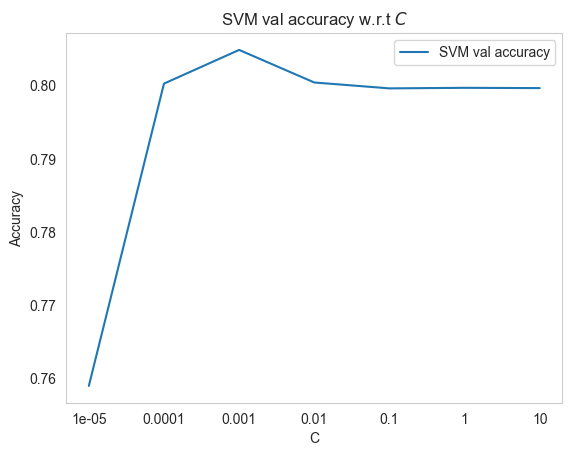

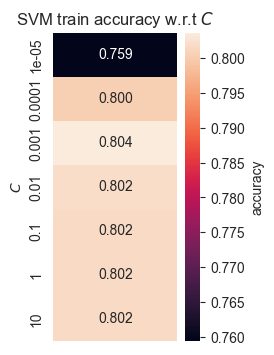

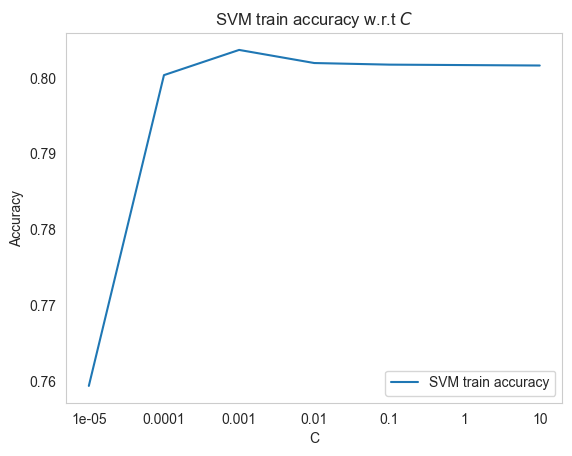

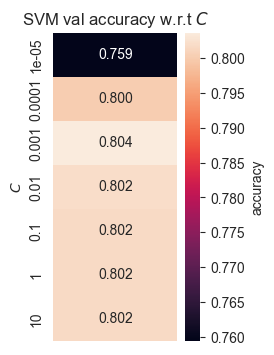

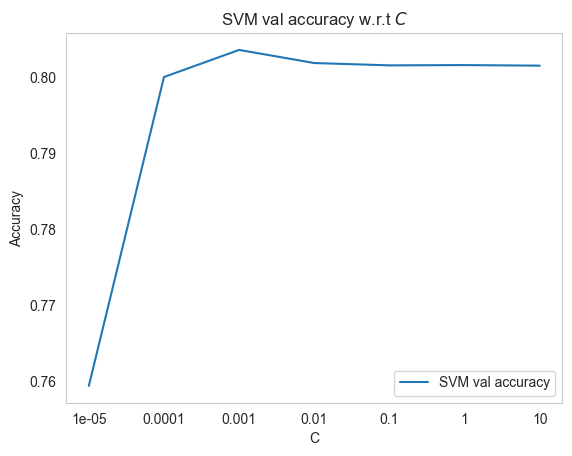

/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


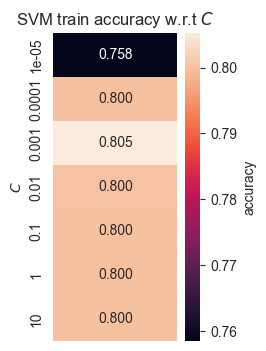

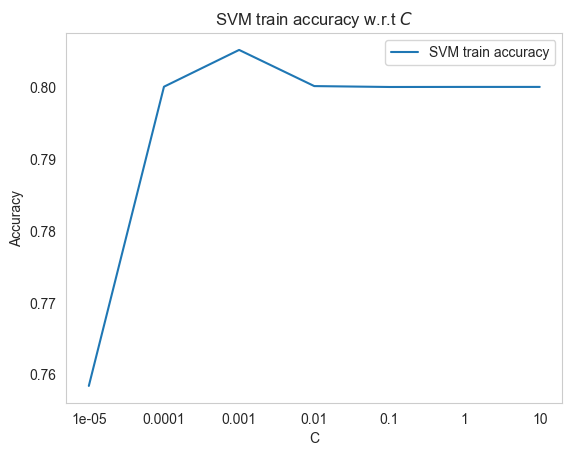

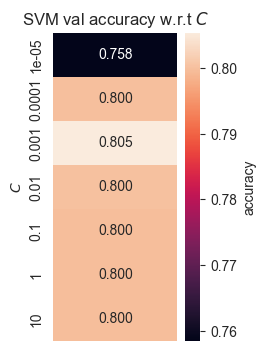

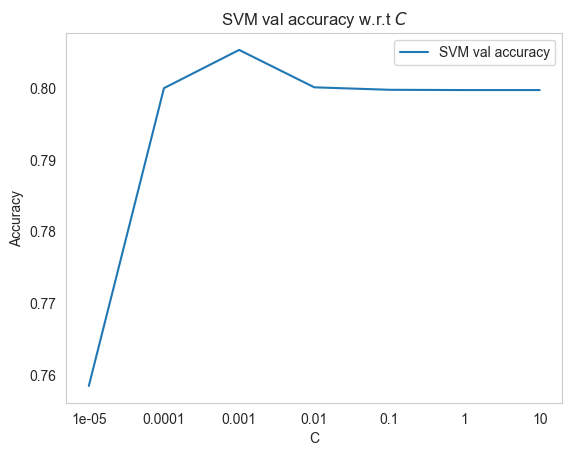

Test Accuracy Average Over 3 Trials for SVM =  0.8095603664465939
Partition:  0.5


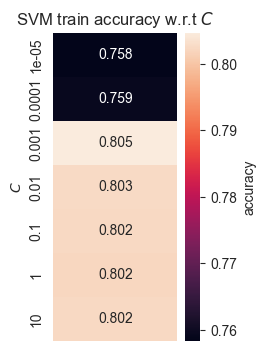

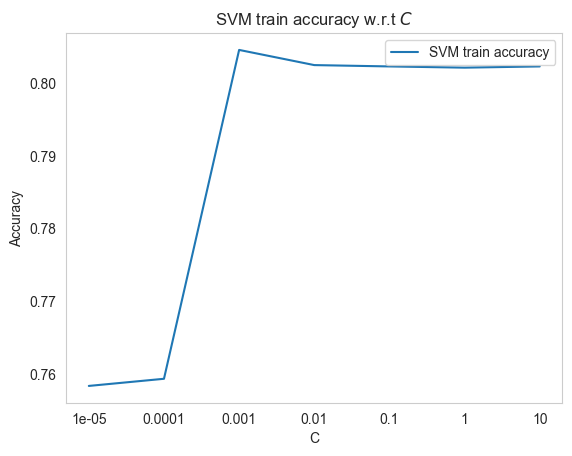

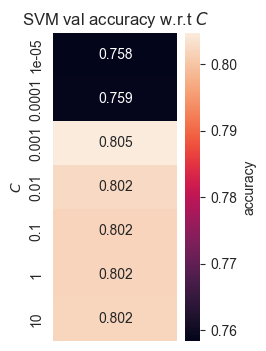

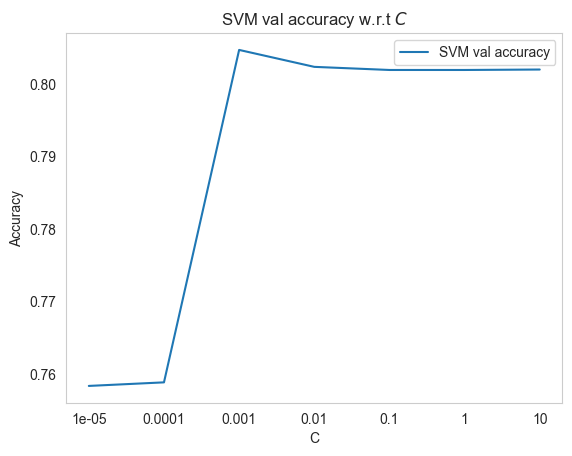

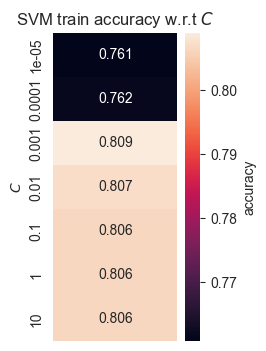

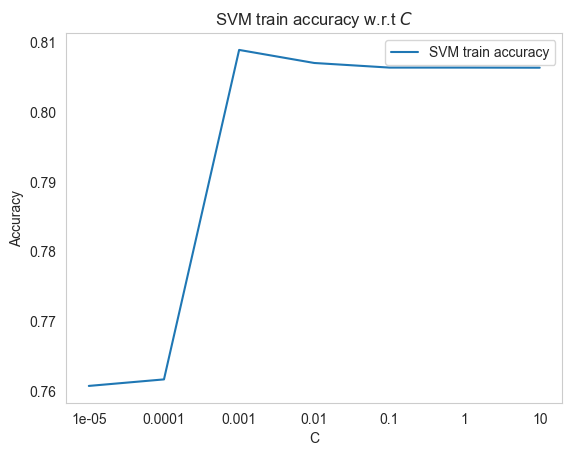

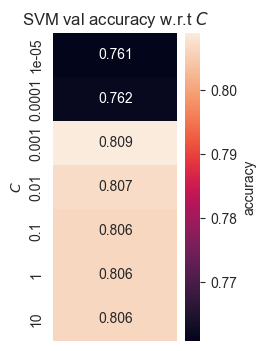

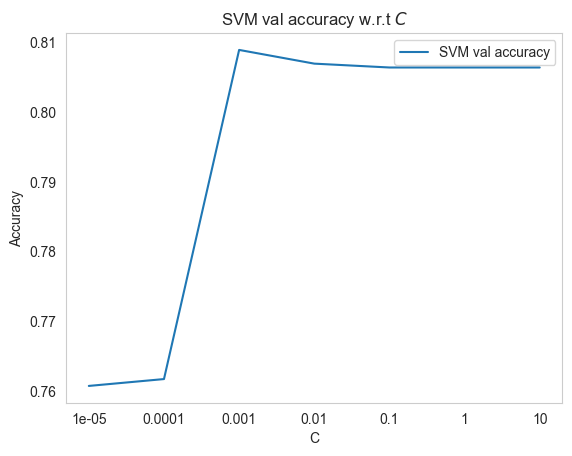

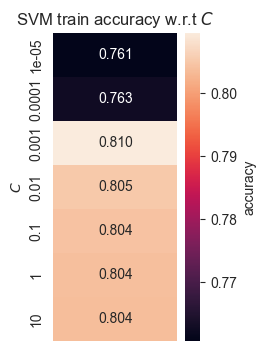

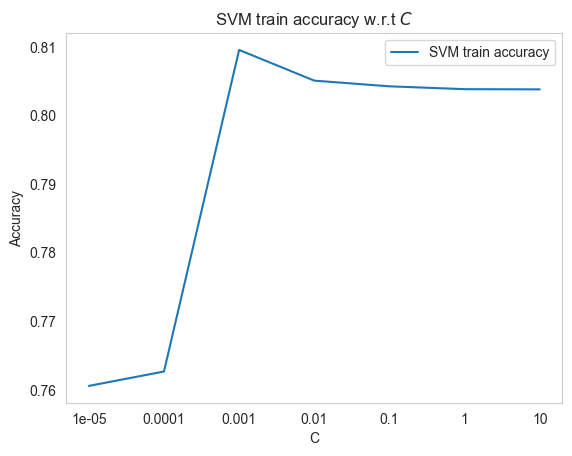

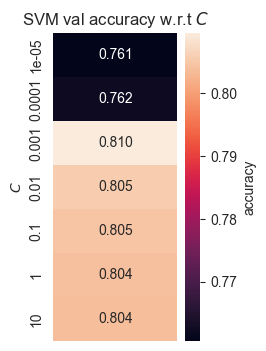

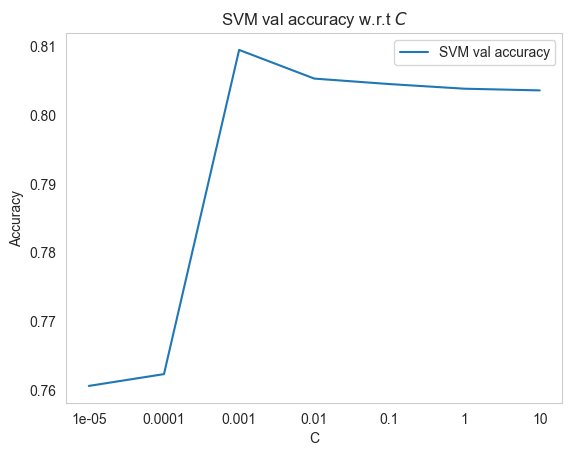

Test Accuracy Average Over 3 Trials for SVM =  0.8047212497184857
Partition:  0.2


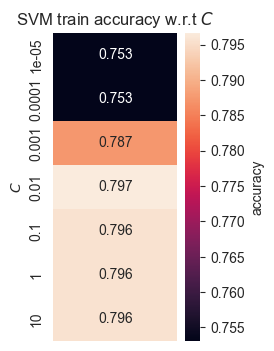

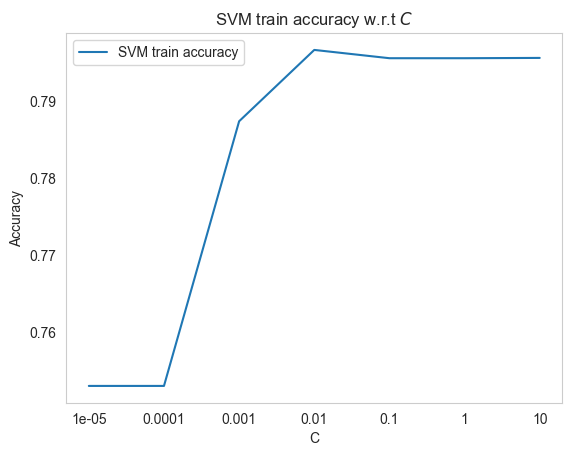

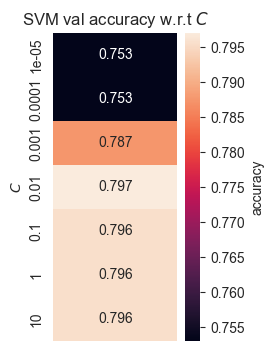

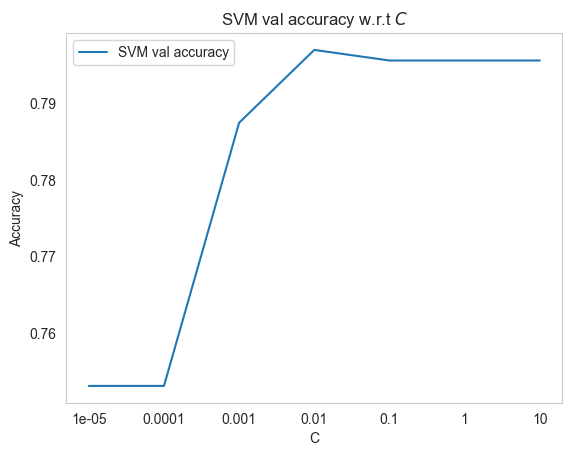

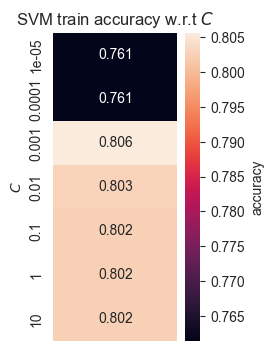

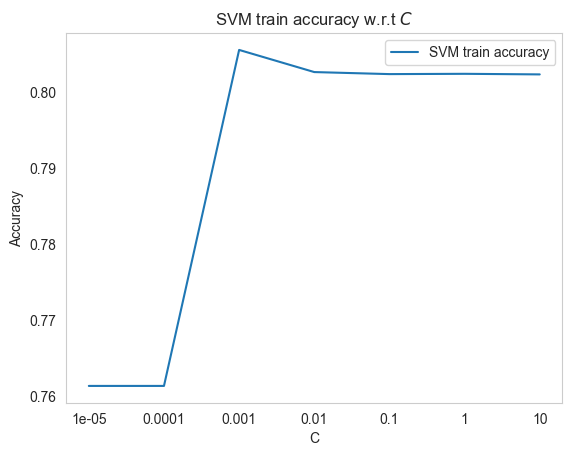

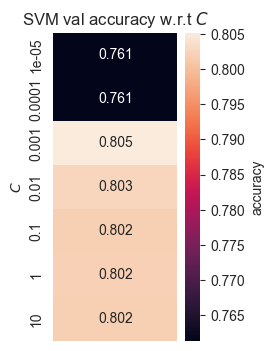

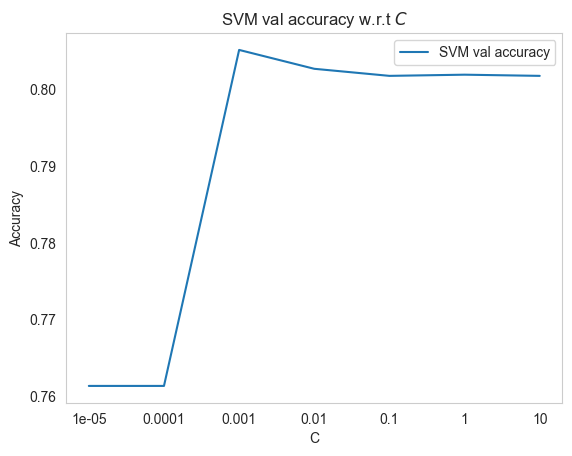

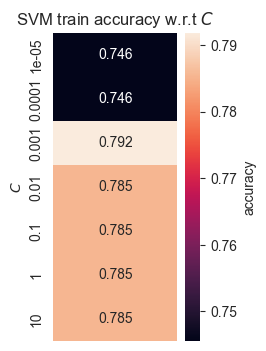

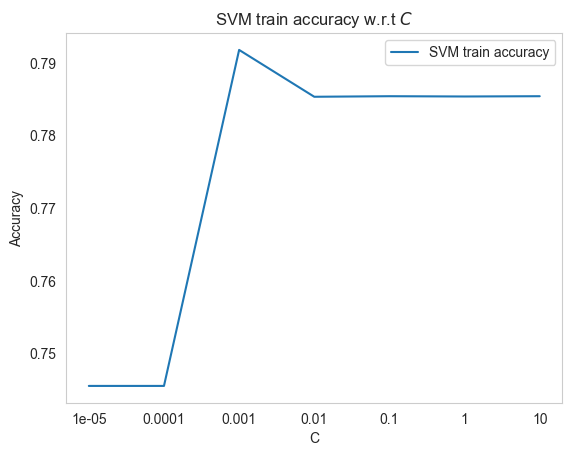

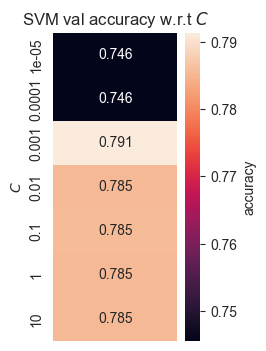

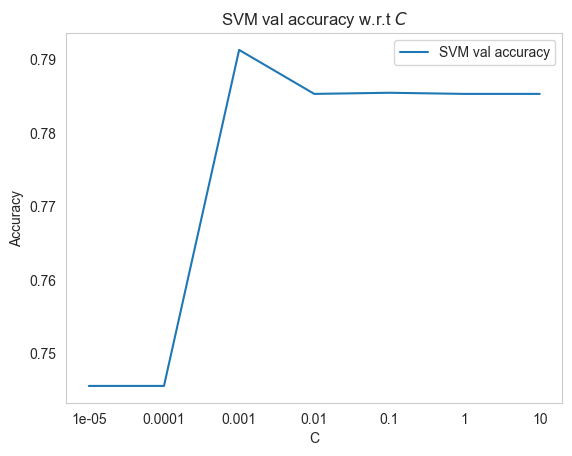

Test Accuracy Average Over 3 Trials for SVM =  0.8085531114438175


In [16]:
partition_val = [0.8, 0.5, 0.2]
for i, partition in enumerate(partition_val):
    print("Partition: ", partition)
    svm_test_acc = []

    for trial in range(3):
        np.random.shuffle(data)
        X_train = data[:int(partition*len(data)), :-1]
        Y_train = data[:int(partition*len(data)), -1]
        X_test = data[int(partition*len(data)):, :-1]
        Y_test = data[int(partition*len(data)):, -1]

        test_acc, best_train, c = svm_classifier()
        svm_test_acc.append(test_acc)
        
    avg_test_acc = sum(svm_test_acc)/3
    avg_test_acc_result[i, 1] = avg_test_acc
    best_train_result[i, 1] = best_train
    best_param_result[i, 1] = c
    
    print("Test Accuracy Average Over 3 Trials for SVM = ", avg_test_acc)

### 3.3 Using KNN Classifier

In [17]:
def knn_classifier():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    parameters = {'n_neighbors':k_list}
    classifier_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_scaled, Y_train)
    
    draw_heatmap(classifier_grid.cv_results_['mean_train_score'].reshape(10,1), 'KNN train accuracy', k_list, 'K')
    draw_curve(classifier_grid.cv_results_['mean_train_score'].reshape(10,1), 'KNN train accuracy', k_list, 'K')
    
    draw_heatmap(classifier_grid.cv_results_['mean_test_score'].reshape(10,1), 'KNN val accuracy', k_list, 'K')
    draw_curve(classifier_grid.cv_results_['mean_test_score'].reshape(10,1), 'KNN val accuracy', k_list, 'K')
    
    classifier_test2 = KNeighborsClassifier(n_neighbors=classifier_grid.best_params_['n_neighbors'])
    classifier_test2.fit(X_train_scaled,Y_train)
    test_acc = classifier_test2.score(X_test_scaled,Y_test)
    
    train_acc = classifier_grid.cv_results_['mean_train_score']
    for i,j in enumerate(k_list):
        if j == classifier_grid.best_params_['n_neighbors']:
            best_train_acc = train_acc[i]
    
    return test_acc, best_train_acc, classifier_grid.best_params_['n_neighbors']

Partition:  0.8


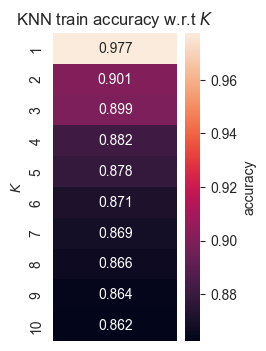

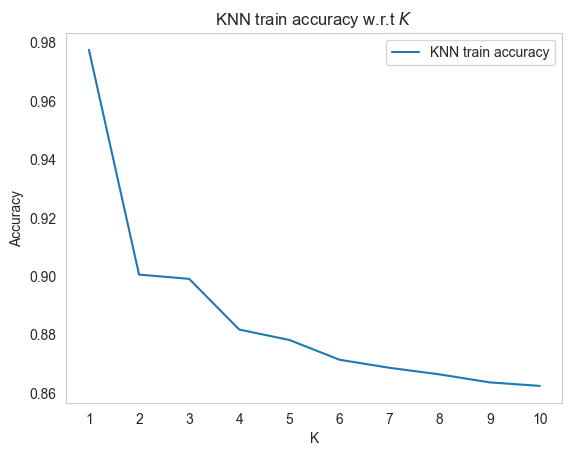

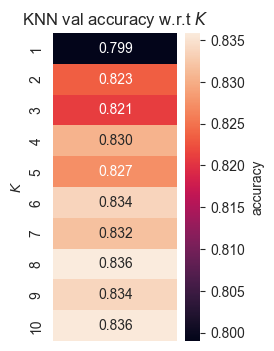

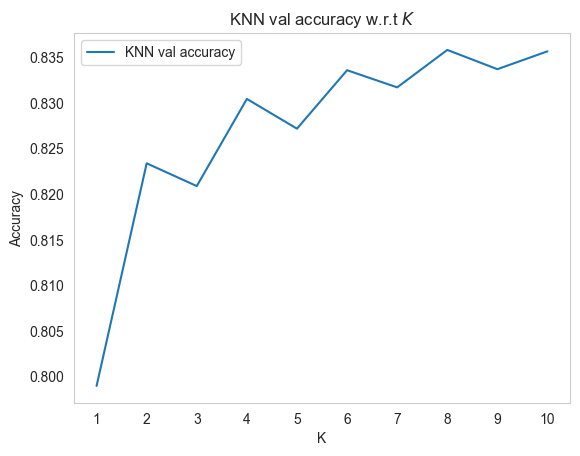

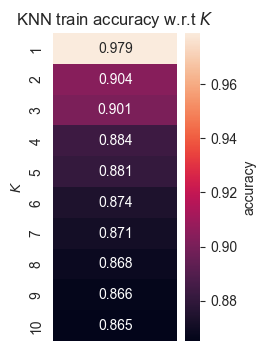

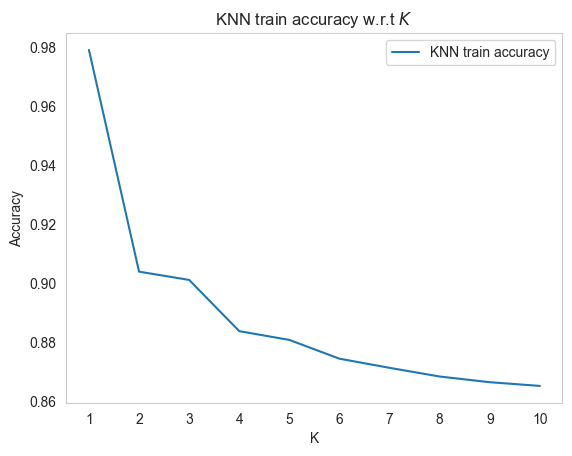

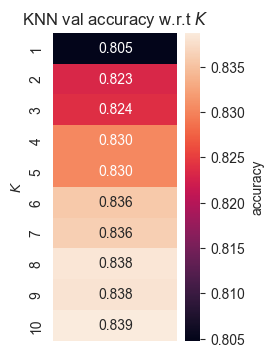

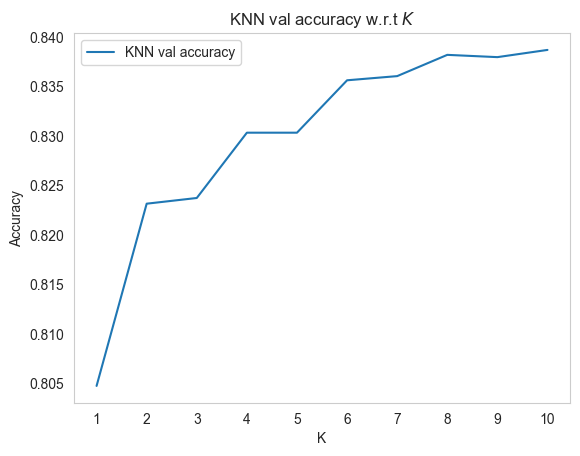

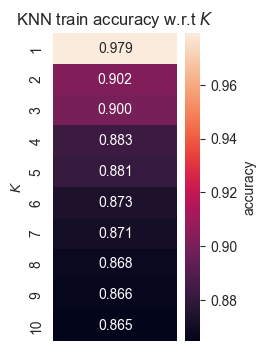

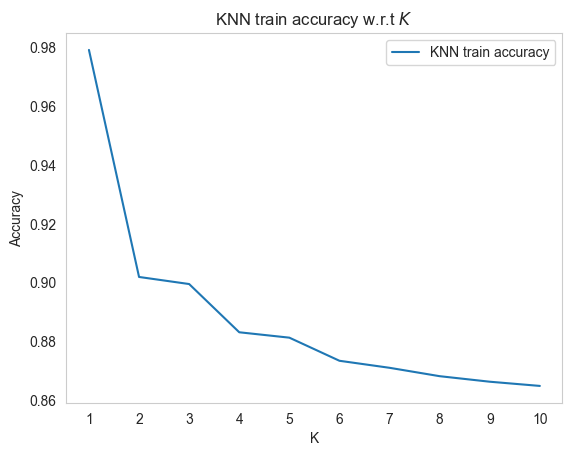

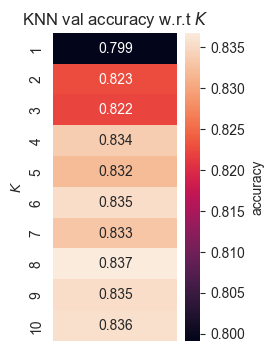

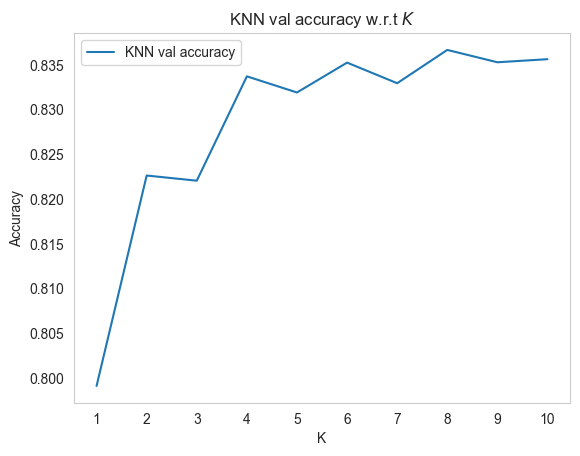

Test Accuracy Average Over 3 Trials for KNN =  0.836276165617483
Partition:  0.5


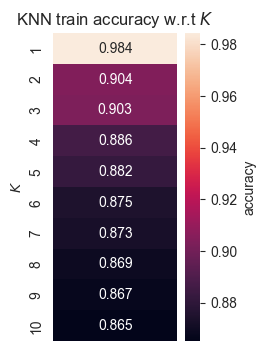

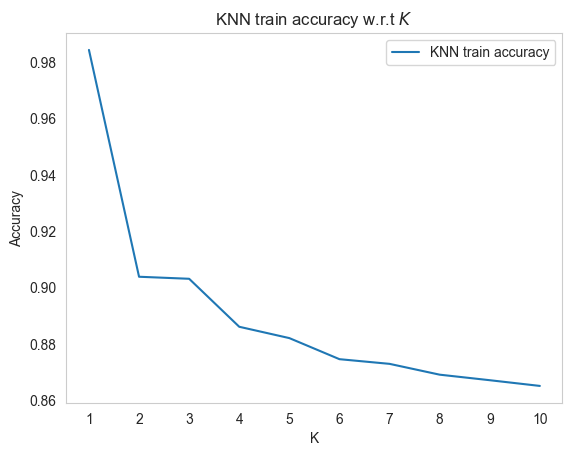

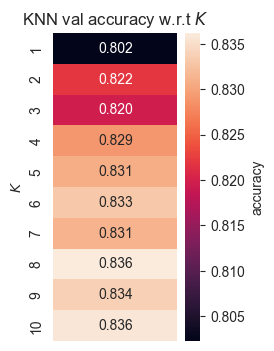

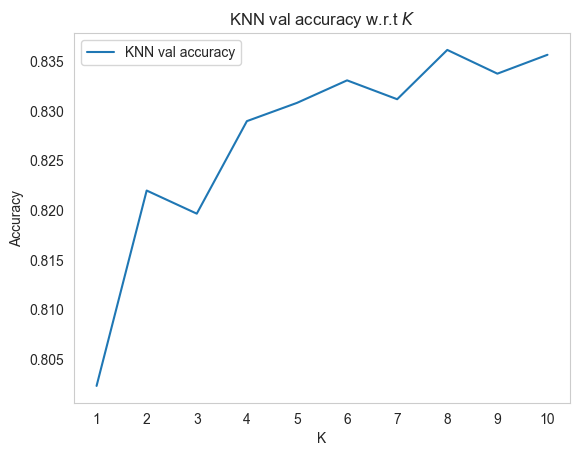

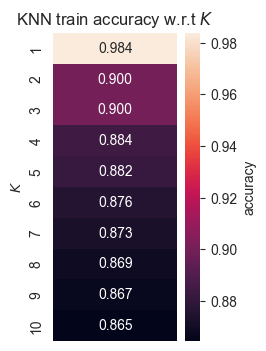

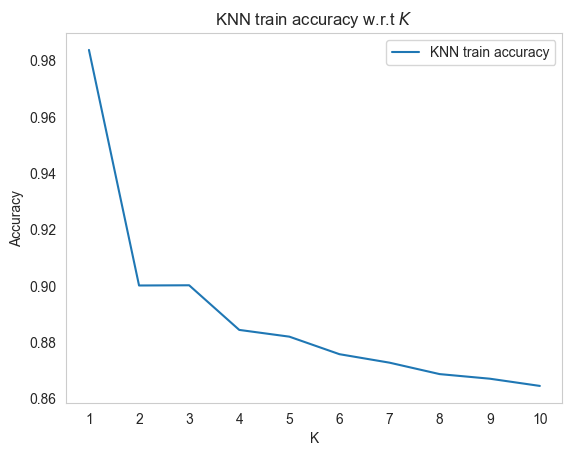

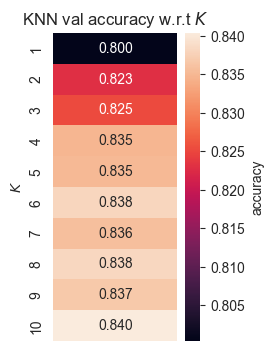

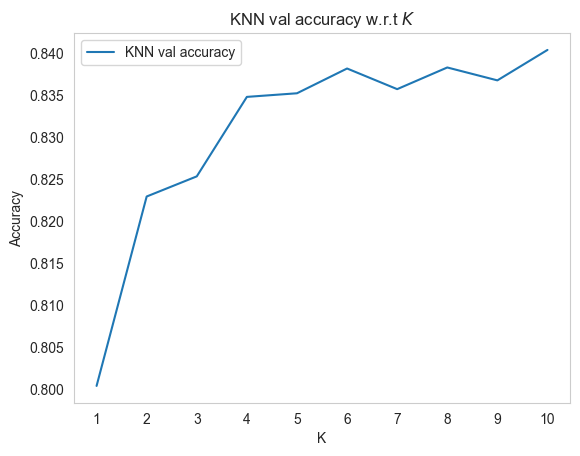

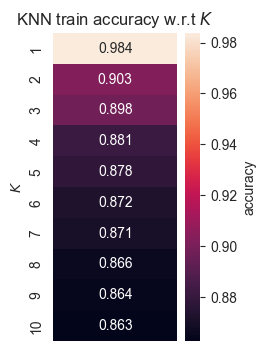

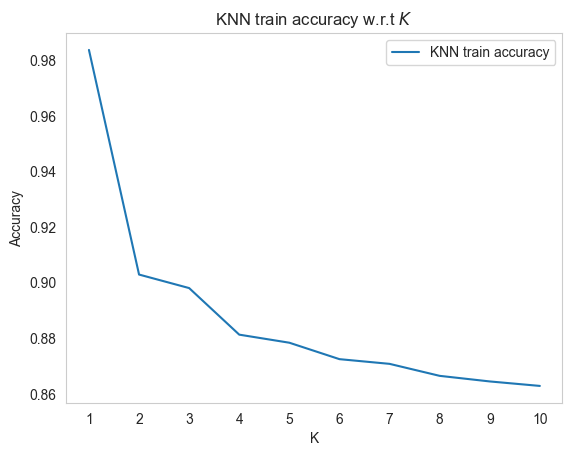

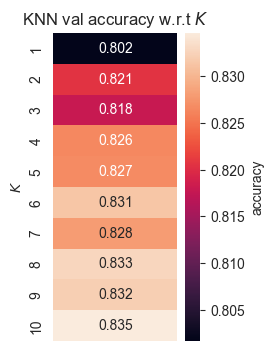

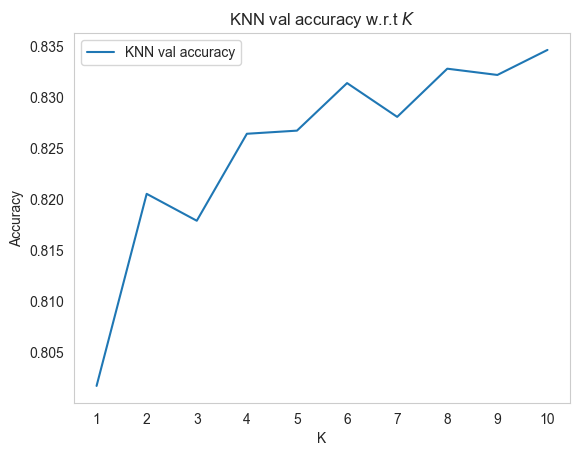

Test Accuracy Average Over 3 Trials for KNN =  0.8337530454722274
Partition:  0.2


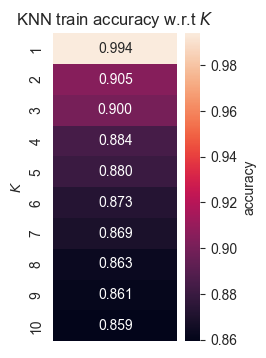

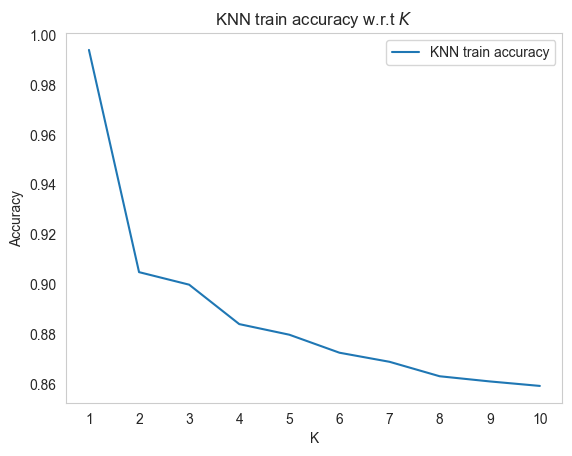

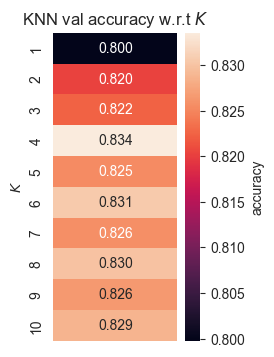

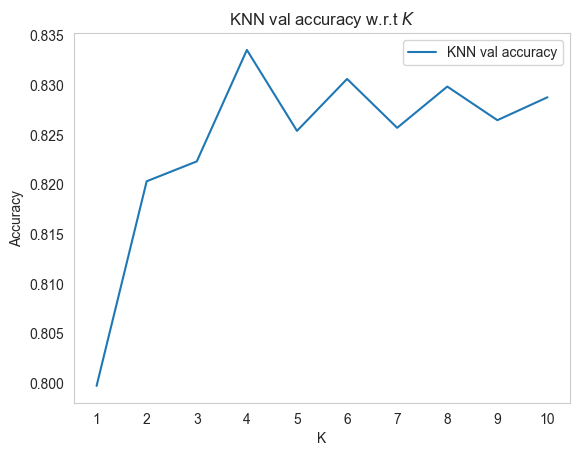

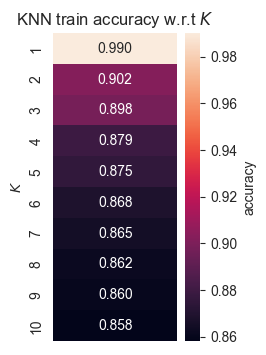

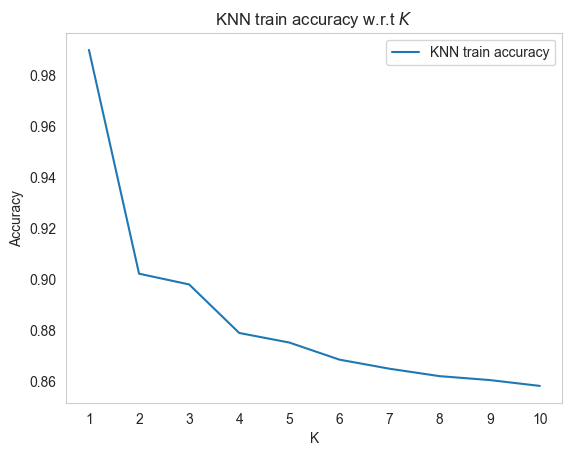

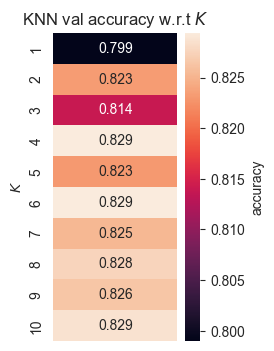

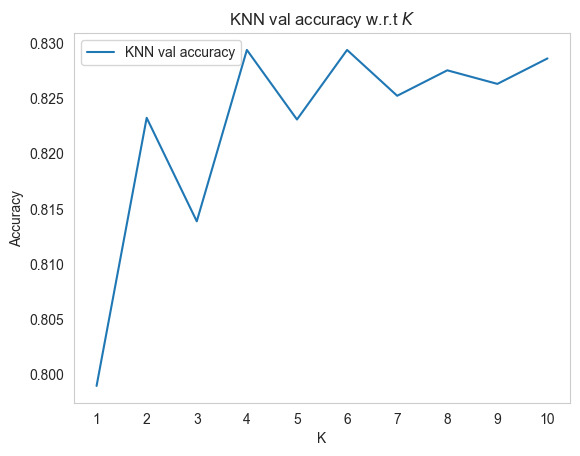

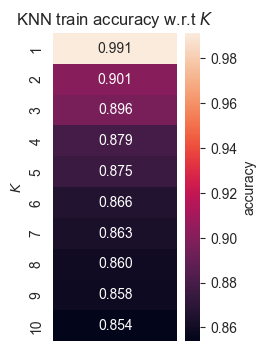

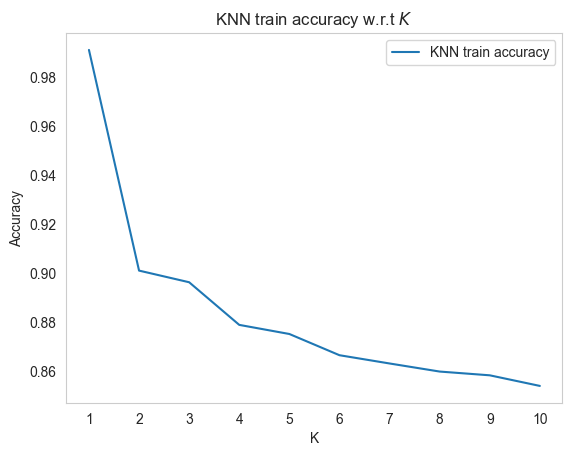

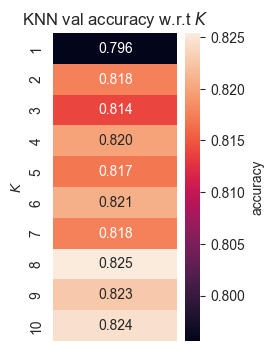

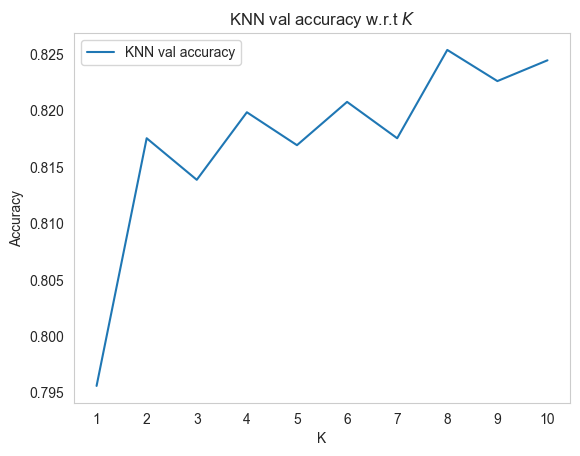

Test Accuracy Average Over 3 Trials for KNN =  0.8249069062152099


In [18]:
partition_val = [0.8, 0.5, 0.2]
for i, partition in enumerate(partition_val):
    print("Partition: ", partition)
    knn_test_acc = []

    for trial in range(3):
        np.random.shuffle(data)
        X_train = data[:int(partition*len(data)), :-1]
        Y_train = data[:int(partition*len(data)), -1]
        X_test = data[int(partition*len(data)):, :-1]
        Y_test = data[int(partition*len(data)):, -1]

        test_acc, best_train, c = knn_classifier()
        knn_test_acc.append(test_acc)
        
    avg_test_acc = sum(knn_test_acc)/3
    avg_test_acc_result[i, 2] = avg_test_acc
    best_train_result[i, 2] = best_train
    best_param_result[i, 2] = c
    
    print("Test Accuracy Average Over 3 Trials for KNN = ", avg_test_acc)

### 4. Results

In [19]:
print(avg_test_acc_result)

[[0.80751318 0.80956037 0.83627617]
 [0.80103597 0.80472125 0.83375305]
 [0.80175822 0.80855311 0.82490691]]


In [20]:
print(best_train_result)

[[0.8018946  0.80525377 0.86821447]
 [0.8033016  0.80961302 0.86286855]
 [0.80977432 0.79180779 0.85979724]]


In [21]:
print(best_param_result)

[[1.e-03 1.e-03 8.e+00]
 [1.e-03 1.e-03 1.e+01]
 [1.e-02 1.e-03 8.e+00]]
